In [1]:
import textstat
import itables
import os
import getpass
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
from scr.scraper.scraper import scrape_article_content, scrape_yale_health_links
from scr.translator.ai_translator import rewrite_article_for_5th_graders

In [48]:
# standard list of links for now
article_links = [
'https://medicine.yale.edu/news-article/what-is-your-word-for-change-a-global-call-to-youth-to-inspire-a-new-humanism-for-a-brighter-future/',
'https://medicine.yale.edu/news-article/study-reveals-how-calcium-channel-mutations-lead-to-cognitive-dysfunction/',
'https://medicine.yale.edu/internal-medicine/news-article/improving-health-outcomes-through-community-outreach/',
'https://medicine.yale.edu/news-article/a-better-covid-treatment-for-the-immunocompromised/',
'https://medicine.yale.edu/internal-medicine/news-article/artificial-intelligence-medical-education-research-patient-care/',
'https://medicine.yale.edu/internal-medicine/news-article/polycystic-kidney-disease-treatment-gene-target-identified/',
'https://medicine.yale.edu/news-article/covid-19-new-omics-models-show-why-some-people-are-at-greater-risk-of-severe-disease-death/',
'https://medicine.yale.edu/psychiatry/news-article/first-us-trial-of-varenicline-for-e-cigarette-cessation-shows-positive-results/',
'https://medicine.yale.edu/ortho/news-article/yale-orthopaedics-chair-performs-first-in-house-3d-surgical-case/',
'https://medicine.yale.edu/news-article/search-affordable-treatment-option-liver-disease/',
'https://medicine.yale.edu/news-article/filling-a-gap-in-training-medical-students-to-care-for-transgender-and-gender-diverse-patients/',
'https://medicine.yale.edu/ycci/news-article/a-new-kind-of-clinical-trial-bringing-long-covid-research-into-patients-homes/',
'https://medicine.yale.edu/internal-medicine/news-article/curbing-the-price-of-novel-diabetes-and-obesity-medications/',
'https://medicine.yale.edu/news-article/in-situ-microscopy-gives-atomic-level-view-in-native-mitochondria/',
'https://medicine.yale.edu/internal-medicine/news-article/investigating-the-link-between-metabolism-and-cancer/',
'https://medicine.yale.edu/news-article/celebrating-health-profession-students-poetry-prose-and-visual-arts/',
'https://medicine.yale.edu/news-article/in-the-early-steps-of-cancer-formation-timing-matters/',
'https://medicine.yale.edu/internal-medicine/news-article/five-reasons-to-see-a-pulmonologist/',
'https://medicine.yale.edu/news-article/students-and-faculty-mentors-celebrated-at-student-research-day/',
'https://medicine.yale.edu/news-article/stem-cell-research-uncovers-clues-to-tissue-repair-that-could-help-heal-the-uterus-and-more/',
'https://medicine.yale.edu/internal-medicine/news-article/yale-experts-benefits-of-exercise/',
]

In [47]:
# Collect the data
data = []
for link in article_links:
    article_data = scrape_article_content(link)
    data.append(article_data)

# Create the DataFrame
df = pd.DataFrame(data).drop(columns=['raw_html'])

In [49]:
# get readability scores for the dataframe
scores_df = df[['title']].copy()

scores_df['SMOG'] = df['text'].apply(textstat.smog_index)
scores_df['Flesch-Kincaid Reading Ease'] = df['text'].apply(textstat.flesch_reading_ease)
scores_df['Flesch-Kincaid Grade Level'] = df['text'].apply(textstat.flesch_kincaid_grade)
scores_df['Gunning Fog'] = df['text'].apply(textstat.gunning_fog)


itables.show(scores_df)

# Translated text

In [50]:
# ensure that the Anthropic API key exists on the system
if not os.getenv('ANTHROPIC_API_KEY'):
    api_key = getpass.getpass('ANTHROPIC_API_KEY not found. Please enter your API key: ')
    os.environ['ANTHROPIC_API_KEY'] = api_key

In [6]:
translated_df = df[['title']].copy()
translated_df['5th_grade_text'] = df['text'].apply(rewrite_article_for_5th_graders)

itables.show(translated_df)

In [7]:
translated_df.to_csv("5th_grade_reading.csv")

In [59]:
translated_df = pd.read_csv("5th_grade_reading.csv")

translated_df

,Unnamed: 0,title,5th_grade_text
0,0,Study Reveals How Calcium Channel Mutations Le...,Top 3 main ideas:\n1. A new study has found th...
1,1,How Can Artificial Intelligence Advance Medica...,Top 3 Main Ideas:\n1. Yale faculty are using a...
2,2,Improving Health Outcomes Through Community Ou...,Main Ideas:\n1. The combined rheumatology/derm...
3,3,Polycystic Kidney Disease Treatment: Gene Targ...,Top 3 main ideas:\n1. Researchers have discove...
4,4,In Situ Microscopy Gives Atomic-level View in ...,Top 3 main ideas:\n1. A new high-resolution mi...
5,6,First U.S. Trial of Varenicline for E-cigarett...,"Main Ideas:\n1. Varenicline, an FDA-approved m..."
6,7,Stem Cell Research Uncovers Clues to Tissue Re...,Top 3 Main Ideas:\n1. Stem cells help repair d...
7,8,Yale Begins 3D Orthopaedic Surgical Procedures...,Top 3 main ideas:\n1. Yale has performed its f...
8,10,A New Kind of Clinical Trial: Bringing Long CO...,Top 3 main ideas:\n1. Decentralized clinical t...
9,11,Beyond Weight Loss: Five Yale Experts on the B...,Top 3 main ideas:\n1. Exercise provides numero...


In [60]:
fifth_grade_scores_df = translated_df[['title']].copy()

fifth_grade_scores_df['SMOG'] = translated_df['5th_grade_text'].apply(textstat.smog_index)
fifth_grade_scores_df['Flesch-Kincaid Reading Ease'] = translated_df['5th_grade_text'].apply(textstat.flesch_reading_ease)
fifth_grade_scores_df['Flesch-Kincaid Grade Level'] = translated_df['5th_grade_text'].apply(textstat.flesch_kincaid_grade)
fifth_grade_scores_df['Gunning Fog'] = translated_df['5th_grade_text'].apply(textstat.gunning_fog)

fifth_grade_scores_df

,title,SMOG,Flesch-Kincaid Reading Ease,Flesch-Kincaid Grade Level,Gunning Fog
0,Study Reveals How Calcium Channel Mutations Le...,12.3,58.92,10.2,10.90
1,How Can Artificial Intelligence Advance Medica...,11.5,61.97,9.0,10.01
2,Improving Health Outcomes Through Community Ou...,10.2,63.70,8.4,8.65
3,Polycystic Kidney Disease Treatment: Gene Targ...,11.6,61.67,9.1,10.53
4,In Situ Microscopy Gives Atomic-level View in ...,13.6,50.57,11.3,11.56
5,First U.S. Trial of Varenicline for E-cigarett...,11.2,60.65,9.5,9.90
6,Stem Cell Research Uncovers Clues to Tissue Re...,10.2,70.02,8.0,9.31
7,Yale Begins 3D Orthopaedic Surgical Procedures...,10.6,63.39,8.5,8.57
8,A New Kind of Clinical Trial: Bringing Long CO...,11.9,59.33,10.0,10.44
9,Beyond Weight Loss: Five Yale Experts on the B...,10.9,65.12,7.8,8.20


In [55]:
scores_df

,title,SMOG,Flesch-Kincaid Reading Ease,Flesch-Kincaid Grade Level,Gunning Fog
0,Words for Change: Yale students join global ca...,13.0,50.77,11.2,11.84
1,Study Reveals How Calcium Channel Mutations Le...,15.3,32.53,14.1,13.82
2,Improving Health Outcomes Through Community Ou...,15.1,33.24,13.8,13.58
3,A Better COVID Treatment for the Immunocomprom...,14.4,49.96,11.6,12.77
4,How Can Artificial Intelligence Advance Medica...,14.7,39.97,13.3,13.03
5,Polycystic Kidney Disease Treatment: Gene Targ...,14.4,47.62,12.5,12.97
6,COVID-19: New ‘Omics’ Models Show Why Some Peo...,15.2,33.34,13.8,14.05
7,First U.S. Trial of Varenicline for E-cigarett...,12.5,58.01,10.5,11.31
8,Yale Begins 3D Orthopaedic Surgical Procedures...,16.6,36.73,14.6,14.95
9,Search for Affordable Treatment Option for Liv...,14.9,39.06,13.7,14.11


# Data Analysis

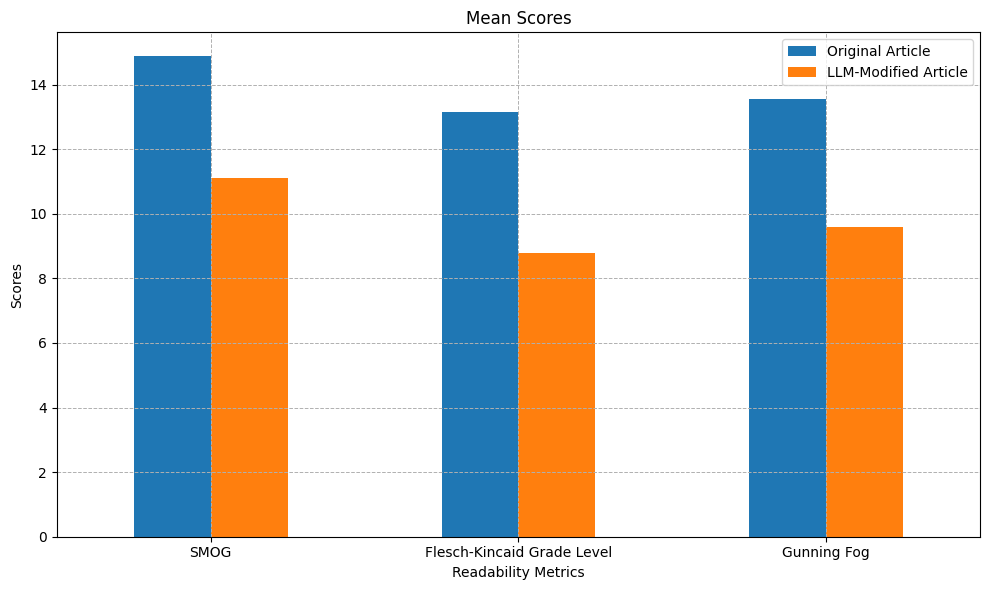

In [61]:
# Metrics plot
mean_og_scores = scores_df.copy().drop(columns=['title', 'Flesch-Kincaid Reading Ease']).mean()
mean_translated_scores = fifth_grade_scores_df.copy().drop(columns=['title', 'Flesch-Kincaid Reading Ease']).mean()

data = {
    'Readability Metric': ['SMOG', 'Flesch-Kincaid Grade Level', 'Gunning Fog'],
    'Original Article': mean_og_scores,
    'LLM-Modified Article': mean_translated_scores
}

metrics_plot_one = pd.DataFrame(data)

metrics_plot_one.set_index('Readability Metric', inplace=True)

ax = metrics_plot_one.plot(kind='bar', figsize=(10, 6))

plt.title('Mean Scores')
plt.xlabel('Readability Metrics')
plt.ylabel('Scores')
plt.xticks(rotation=0)
plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

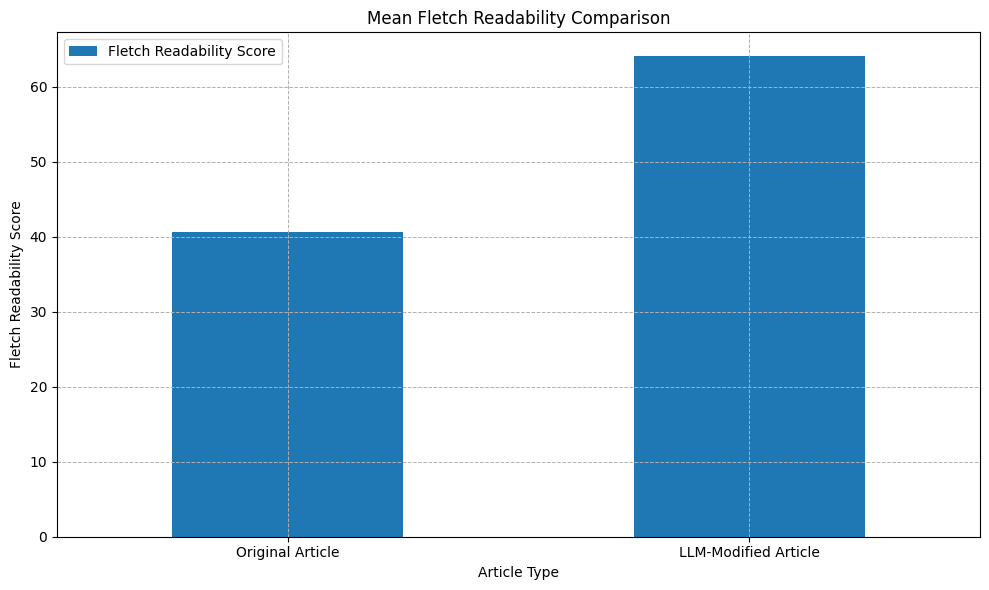

In [62]:
flech_reading_og = scores_df['Flesch-Kincaid Reading Ease'].copy().mean()
flech_reading_translated = fifth_grade_scores_df['Flesch-Kincaid Reading Ease'].copy().mean()

metrics_plot_two = pd.DataFrame({
    'Article Type': ['Original Article', 'LLM-Modified Article'],
    'Fletch Readability Score': [flech_reading_og, flech_reading_translated]
})

ax = metrics_plot_two.plot(kind='bar', x='Article Type', y='Fletch Readability Score', figsize=(10, 6))

plt.title('Mean Fletch Readability Comparison')
plt.xlabel('Article Type')
plt.ylabel('Fletch Readability Score')
plt.xticks(rotation=0)
plt.grid(True, which='both', linestyle='--', linewidth=0.7)

plt.tight_layout()
plt.show()

In [64]:
mean_og_scores

SMOG                          14.876190
Flesch-Kincaid Grade Level    13.166667
Gunning Fog                   13.558571
dtype: float64

In [65]:
mean_translated_scores

SMOG                          11.118182
Flesch-Kincaid Grade Level     8.772727
Gunning Fog                    9.605000
dtype: float64

In [63]:
computable_og_scores = scores_df.copy().drop(columns=['title'])
computable_translated_scores = fifth_grade_scores_df.copy().drop(columns=['title'])

delta_df = computable_translated_scores - computable_og_scores

delta_df.mean()

SMOG                           -3.776190
Flesch-Kincaid Reading Ease    23.404762
Flesch-Kincaid Grade Level     -4.366667
Gunning Fog                    -3.916667
dtype: float64